# **Assignment 1**
## **Group 3:**
* Karyl Grasparil
* Mariah Quinquito
* Yanna Polonia

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **1. Data Steps**

## Loading Date_Fruit_Datasets.csv into a pandas dataframe named data and displaying its header

In [3]:
data = pd.read_csv('Date_Fruit_Datasets.csv')
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


## Using pandas.DataFrame.describe to summarize the data

In [4]:
data.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


### Explaining the meaning of the columns and making observations about the dataset

<table>
<tr><tr><th><th style="text-align:center">Feature<th style="text-align:center">Description<th style="text-align:center">Observations<tr><tr>
<tr><td><td style="text-align:center">AREA<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among morphological ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is somehow is clustered close to the mean<td>
<tr><td><td style="text-align:center">PERIMETER<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among morphological ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is somehow is clustered close to the mean<td>
<tr><td><td style="text-align:center">MAJOR_AXIS<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among morphological ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is somehow is clustered close to the mean<td>
<tr><tr><tr><td><td style="text-align:center">MINOR_AXIS<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among morphological ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is clustered close to the mean<td>
<tr><td><td style="text-align:center">ECCENTRICITY<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among morphological ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is somehow is clustered close to the mean<td>
<tr><td><td style="text-align:center">EQDIASQ<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among morphological ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is somehow clustered close to the mean<td>
<tr><td><td style="text-align:center">SOLIDITY<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among morphological ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is clustered close to the mean<td>
<tr><tr><tr><td><td style="text-align:center">CONVEX_AREA<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among morphological ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is somehow is clustered close to the mean<td>
<tr><td><td style="text-align:center">EXTENT<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among morphological ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is somehow is clustered close to the mean<td>
<tr><td><td style="text-align:center">ASPECT_RATIO<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among morphological ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is higly dispersed<td>
<tr><td><td style="text-align:center">ROUNDNESS<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among morphological ones<td style="text-align:left"><td>
<tr><td><td style="text-align:center">COMPACTNESS<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among morphological ones<td style="text-align:left"><td>
<tr><tr><tr><td><td style="text-align:center">SHAPEFACTOR_1<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among shape ones<td style="text-align:left"><td>
<tr><td><td style="text-align:center">SHAPEFACTOR_2<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among shape ones<td style="text-align:left"><td>
<tr><td><td style="text-align:center">SHAPEFACTOR_3<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among shape ones<td style="text-align:left"><td>
<tr><td><td style="text-align:center">SHAPEFACTOR_4<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among shape ones<td style="text-align:left"><td>
<tr><tr><tr><td><td style="text-align:center">MeanRR<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among color ones<td style="text-align:left"><td>
<tr><td><td style="text-align:center">MeanRG<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among color ones<td style="text-align:left"><td>
<tr><tr><tr><td><td style="text-align:center">MeanRB<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among color ones<td style="text-align:left"><td>
<tr><td><td style="text-align:center">StdDevRR<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among color ones<td style="text-align:left"><td>
<tr><td><td style="text-align:center">StdDevRG<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among color ones<td style="text-align:left"><td>
<tr><td><td style="text-align:center">StdDevRB<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among color ones<td style="text-align:left"><td>
<tr><tr><tr><td><td style="text-align:center">SkewRR<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among color ones<td style="text-align:left"><td>
<tr><td><td style="text-align:center">SkewRG<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among color ones<td style="text-align:left"><td>
<tr><td><td style="text-align:center">SkewRB<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among color ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse and right-skewed<td>
<tr><td><td style="text-align:center">KURTOSISRR<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among color ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is somehow disperse and right-skewed<td>
<tr><td><td style="text-align:center">KURTOSISRG<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among color ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is somehow is clustered close to the mean<td>
<tr><tr><tr><td><td style="text-align:center">KURTOSISRB<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among color ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is clustered close to the mean<td>
<tr><td><td style="text-align:center">ENTROPYRR<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among color ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse<td>
<tr><td><td style="text-align:center">ENTROPYRG<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among color ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse<td>
<tr><td><td style="text-align:center">ENTROPYEB<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among color ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is highly disperse<td>
<tr><tr><tr><td><td style="text-align:center">ALLdaub4RR<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the main features, among color ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially disperse and right-skewed<td>
<tr><tr><tr><td><td style="text-align:center">ALLdaub4RG<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among color ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially disperse and right-skewed<td>
<tr><td><td style="text-align:center">ALLdaub4RB<td style="text-align:left">According to <a href="https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/4793293">Research Article Classification of Date Fruits into Genetic Varieties Using Image Analysis</a> one of the subfeatures, among color ones<td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially disperse and right-skewed<td>
</table>

## Checking for missing values and data type

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [6]:
# Changing columns (features): AREA, CONVEX_AREA, ENTROPYRG and ENTROPYRB values to floats and column Class to string values
data['AREA'] = data['AREA'].astype(float)
data['CONVEX_AREA'] = data['CONVEX_AREA'].astype(float)
data['EntropyRG'] = data['EntropyRG'].astype(float)
data['EntropyRB'] = data['EntropyRB'].astype(float)
data['Class'] = data['Class'].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    float64
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    float64
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

## Checking for duplicate entries

In [7]:
# Using pandas.DataFrame.duplicates to check for duplicate entries.
duplicates = data.duplicated()

# Printing duplicate entries amount
print(f'Duplicate entries amount: {duplicates.sum()}\n')

# Printing duplicates entries
print('Duplicate entries:\n')
data[duplicates]

Duplicate entries amount: 0

Duplicate entries:



,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class


### <span style='color:blue'>There aren't any duplicates entries</span>

## Creating a bar plot using seaborn.barplot of the number of elements in each category

In [8]:
# Getting the count per each Class
counts = data.groupby('Class').size().reset_index(name='Count')
counts

,Class,Count
0,BERHI,65
1,DEGLET,98
2,DOKOL,204
3,IRAQI,72
4,ROTANA,166
5,SAFAVI,199
6,SOGAY,94


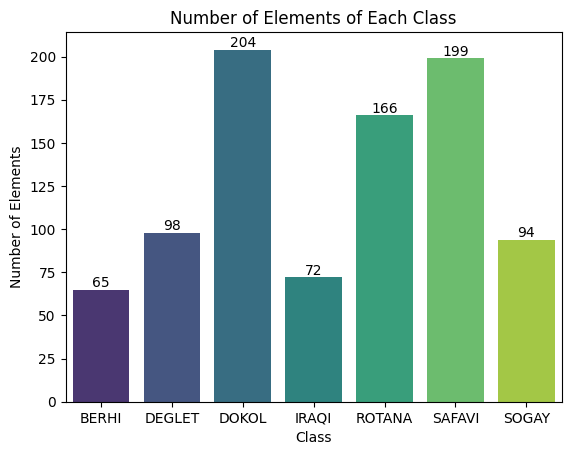

In [9]:
plot = sns.barplot(data = counts, x = "Class", y = "Count", hue = "Class", palette = 'viridis')

# Adding counts on each bar
for p in plot.patches:
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_height()
    plot.text(x, y, f'{y:.0f}', ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Number of Elements')
plt.title('Number of Elements of Each Class')
plt.show()

## Separating labels from features

In [10]:
features = data.drop(columns = ['Class'])
features

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163.0,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428.0,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-5.919126e+10,-5.071421e+10,-3.992237e+10,58.7255,54.9554,47.8400
1,338136.0,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014.0,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-3.423307e+10,-3.746260e+10,-3.147779e+10,50.0259,52.8168,47.8315
2,526843.0,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876.0,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-9.394835e+10,-7.473822e+10,-6.031121e+10,65.4772,59.2860,51.9378
3,416063.0,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255.0,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-3.207431e+10,-3.206093e+10,-2.957501e+10,43.3900,44.1259,41.1882
4,347562.0,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797.0,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-3.998097e+10,-3.598004e+10,-2.559328e+10,52.7743,50.9080,42.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403.0,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028.0,0.7269,1.4499,...,-0.1398,2.2423,2.3704,2.7202,-2.529642e+10,-1.916888e+10,-1.847339e+10,49.0869,43.0422,42.4153
894,365924.0,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566.0,0.6695,1.5510,...,0.5611,3.4109,3.5805,3.9910,-3.160522e+10,-2.194537e+10,-1.927791e+10,46.8086,39.1046,36.5502
895,254330.0,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255.0,0.7240,1.7159,...,0.2665,2.2759,2.5090,2.6951,-2.224277e+10,-1.959492e+10,-1.759215e+10,44.1325,40.7986,40.9769
896,238955.0,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795.0,0.6954,1.6220,...,0.5325,2.6769,2.6874,2.7991,-2.604860e+10,-2.129982e+10,-1.980998e+10,51.2267,45.7162,45.6260


In [11]:
labels = pd.DataFrame(data['Class'])
labels

,Class
0,BERHI
1,BERHI
2,BERHI
3,BERHI
4,BERHI
...,...
893,SOGAY
894,SOGAY
895,SOGAY
896,SOGAY


## Using sklearn.preprocessing.LabelEncoder to convert the string labels into integers.

In [12]:
# Initializing LabelEncoder
encoder = LabelEncoder()

# Fitting and transforming the labels
labels['Encoded_Class'] = encoder.fit_transform(labels['Class'])
labels

,Class,Encoded_Class
0,BERHI,0
1,BERHI,0
2,BERHI,0
3,BERHI,0
4,BERHI,0
...,...,...
893,SOGAY,6
894,SOGAY,6
895,SOGAY,6
896,SOGAY,6


In [13]:
# Class mapping displaying the encoded class for each class
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'BERHI': 0, 'DEGLET': 1, 'DOKOL': 2, 'IRAQI': 3, 'ROTANA': 4, 'SAFAVI': 5, 'SOGAY': 6}


## Reshape the labels into a 2d array

In [14]:
# Getting rid of Class column
encoded_labels = labels.drop(columns = ['Class'])

encoded_labels_reshaped = encoded_labels.to_numpy()
encoded_labels_reshaped.shape

(898, 1)

## Use sklearn.preprocessing.MinMaxScaler to scale the features (keeping encoded_labels intact)

In [15]:
# Initializing the scaler
scaler = MinMaxScaler()

# Fitting and transforming the features (scaling process)
scaled_features = scaler.fit_transform(features)
scaled_features

array([[0.77227446, 0.77207865, 0.56560444, ..., 0.67351302, 0.55053709,
        0.4946647 ],
       [0.61783464, 0.61747978, 0.43690403, ..., 0.53892305, 0.51634149,
        0.49450116],
       [0.96467405, 0.9133745 , 0.6817325 , ..., 0.77796738, 0.61978216,
        0.57350706],
       ...,
       [0.46380101, 0.53411457, 0.46362467, ..., 0.44774729, 0.32417389,
        0.36261751],
       [0.43554209, 0.52334284, 0.42881001, ..., 0.55750041, 0.40280492,
        0.45206697],
       [0.62823025, 0.72490601, 0.5497979 , ..., 0.4974535 , 0.29056351,
        0.33754565]])

## Splitting the data into training, testing and validation sets with appropriate proportions

In [16]:
train_scaled_features, reminder_features, train_encoded_labels, reminder_labels = \
    train_test_split(scaled_features, encoded_labels, train_size = 0.75, random_state = 42)

test_scaled_features, val_scaled_features, test_encoded_labels, val_encoded_labels = train_test_split(
    reminder_features, reminder_labels, test_size = 0.15, random_state = 42)

In [17]:
# Displaying splitted data length and shape
print(f'Train Scaled Features:\n\nLenght: {len(train_scaled_features)} \nShape: {train_scaled_features.shape}')
print(f'\nTest Scaled Features:\n\nLenght: {len(test_scaled_features)} \nShape: {test_scaled_features.shape}')
print(f'\nValidation Scaled Features:\n\nLenght: {len(val_scaled_features)} \nShape: {val_scaled_features.shape}')
print(f'\nTrain Encoded Labels:\n\nLenght:{len(train_encoded_labels)}\nShape: {train_encoded_labels.shape}')
print(f'\nTest Encoded Labels:\n\nLenght: {len(test_encoded_labels)}\nShape: {test_encoded_labels.shape}')
print(f'\nValidation Encoded Labels:\n\nLenght: {len(val_encoded_labels)}\nShape: {val_encoded_labels.shape}')

Train Scaled Features:

Lenght: 673 
Shape: (673, 34)

Test Scaled Features:

Lenght: 191 
Shape: (191, 34)

Validation Scaled Features:

Lenght: 34 
Shape: (34, 34)

Train Encoded Labels:

Lenght:673
Shape: (673, 1)

Test Encoded Labels:

Lenght: 191
Shape: (191, 1)

Validation Encoded Labels:

Lenght: 34
Shape: (34, 1)


## **2. Modeling Steps**

## Using tf.keras.Sequential to create a fully connected artificial neural network with at least two hidden layers and choosing an activation function for each layer, making sure the input and output dimensions are appropriate for the data

In [18]:
model = Sequential()
model.add(Dense(1000,input_shape = (34,), activation = 'relu'))
model.add(Dense(500,  activation = 'relu'))
model.add(Dense(250,  activation = 'relu'))
model.add(Dense(100,  activation = 'relu'))
model.add(Dense(7,  activation = 'softmax'))    # Due to class amount (7), using softmax and 7 neurons in the last layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Printing the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1000)                │          35,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          25,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 686,557 (2.62 MB)

 Trainable params: 686,557 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the model with a choice of optimizer and loss function, and setting the metrics argument equal to 'accuracy'

In [22]:
# Considering this is a classification problem Adam optimizer is a good choice.
# As loss function, using SparseCategoricalCrossentropy as we have 7 labels provided as integer values
model.compile(optimizer=tf.optimizers.Adam(learning_rate = 0.01), loss = 'SparseCategoricalCrossentropy', metrics=['accuracy'])

## Training the model and recording the training accuracy

In [ ]:
model.fit(train_scaled_features, train_encoded_labels, epochs = 30)

Epoch 1/30


2024-09-21 11:08:46.371881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-21 11:08:46.439076: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


22/22 [==============================] - 7s 155ms/step - loss: 181.5596 - accuracy: 0.1828
Epoch 2/30
22/22 [==============================] - 0s 9ms/step - loss: 983.0439 - accuracy: 0.1694
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 1330.9790 - accuracy: 0.1575
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 1215.4536 - accuracy: 0.1872
Epoch 5/30
22/22 [==============================] - 0s 8ms/step - loss: 996.3935 - accuracy: 0.1813
Epoch 6/30
22/22 [==============================] - 0s 8ms/step - loss: 810.2037 - accuracy: 0.1575
Epoch 7/30
22/22 [==============================] - 0s 8ms/step - loss: 1129.3650 - accuracy: 0.2006
Epoch 8/30
22/22 [==============================] - 0s 9ms/step - loss: 1463.9082 - accuracy: 0.1664
Epoch 9/30
22/22 [==============================] - 0s 8ms/step - loss: 1235.7307 - accuracy: 0.1382
Epoch 10/30
22/22 [==============================] - 0s 8ms/step - loss: 1018.8654 - accuracy: 0.2021
Ep

### **<span style=color:blue>Training accuracy is approximately 0.17</span>**

## Finding the validation accuracy and confusion matrix

In [23]:
model.evaluate(val_scaled_features, val_encoded_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1397 - loss: 1.9533 


[1.9526796340942383, 0.14705882966518402]

### **<span style='color:blue'>The Validation set accuracy is approximately 0.15. Therefore comparing to model's train accuracy (0.17), this model is a bit overfitting</span>**

In [24]:
# Generating predictions based on validation set, using np.argmax to actually get integers values for each predicted class
val_predictions = np.argmax(model.predict(val_scaled_features), axis = 1)
val_predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [25]:
# Generating the confusion matrix for validation set
val_cnf_matrix = confusion_matrix(val_encoded_labels, val_predictions)
val_cnf_matrix

array([[0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 5, 0]])

## Returning to the above steps to try at least five different choices of hyperparameters (including dimensions, activation functions, number of layers, optimizer, loss function, etc.). Neatly present a description each model tried along with the training and validation accuracies, and the confusion matrix.

In [26]:
# Creating model1, comparing to model1 keeping the same number of layers but reducing the number of neurons per each one
model1 = Sequential()
model1.add(Dense(500, activation = 'relu'))
model1.add(Dense(250,  activation = 'relu'))
model1.add(Dense(125,  activation = 'relu'))
model1.add(Dense(65,  activation = 'relu'))
model1.add(Dense(7,  activation = 'softmax'))  # Due to class amount (7), using softmax and 7 neurons in the last layer

In [28]:
# Changing optimizer to Adagrad
# As loss function, using SparseCategoricalCrossentropy as we have 7 labels provided as integer values
model1.compile(optimizer=tf.optimizers.Adagrad(learning_rate = 0.01), loss = 'SparseCategoricalCrossentropy', metrics= ['accuracy'])

In [ ]:
# Training model1
model1.fit(train_scaled_features, train_encoded_labels, epochs = 30)

Epoch 1/30


2024-09-21 11:09:15.010086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-21 11:09:15.046101: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


22/22 [==============================] - 2s 43ms/step - loss: 1.7749 - accuracy: 0.4042
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 1.5399 - accuracy: 0.5438
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 1.2790 - accuracy: 0.6077
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 1.1035 - accuracy: 0.6241
Epoch 5/30
22/22 [==============================] - 0s 8ms/step - loss: 0.9356 - accuracy: 0.6761
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 0.8219 - accuracy: 0.7028
Epoch 7/30
22/22 [==============================] - 0s 8ms/step - loss: 0.7931 - accuracy: 0.7132
Epoch 8/30
22/22 [==============================] - 0s 8ms/step - loss: 0.6976 - accuracy: 0.7578
Epoch 9/30
22/22 [==============================] - 0s 8ms/step - loss: 0.6426 - accuracy: 0.7712
Epoch 10/30
22/22 [==============================] - 0s 7ms/step - loss: 0.5965 - accuracy: 0.7949
Epoch 11/30
22/22 [==========

### <span style='color:blue'>model1 training accuracy is approximately 0.86</span>

In [29]:
# Finding validation accuracy for model1
model1.evaluate(val_scaled_features, val_encoded_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1397 - loss: 1.9629


[1.9622464179992676, 0.14705882966518402]

### <span style='color:blue'>model1 validation accuracy is approximately 0.77 Therefore comparing to model1's train accuracy (0.86), this model is overfitting</span>

In [30]:
# Generating predictions based on validation set, using np.argmax to actually get integers values for each predicted class (model1)
val_predictions1 = np.argmax(model1.predict(val_scaled_features), axis = 1)
val_predictions1

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


array([3, 3, 3, 3, 5, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 5, 3, 5, 5, 3, 5, 5, 3, 5])

In [31]:
# Generating the confusion matrix for validation set (model1)
val_cnf_matrix1 = confusion_matrix(val_encoded_labels, val_predictions1)
val_cnf_matrix1

array([[0, 0, 0, 3, 0, 1, 0],
       [0, 0, 0, 4, 0, 1, 0],
       [0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 6, 0, 2, 0],
       [0, 0, 1, 1, 0, 3, 0],
       [0, 0, 0, 5, 0, 0, 0]])

In [32]:
# Creating model2, reducing number of layers, changing the activation function compared to the initial model
model2 = Sequential()
model2.add(Dense(1000, activation = 'softmax'))
model2.add(Dense(500,  activation = 'softmax'))
model2.add(Dense(250,  activation = 'softmax'))
model2.add(Dense(7,  activation = 'softmax'))    # Due to class amount (7), using softmax and 7 neurons in the last layer

In [34]:
# Changing the optimizer to RMSprop
# As loss function, using SparseCategoricalCrossentropy as we have 7 labels provided as integer values
model2.compile(optimizer=tf.optimizers.RMSprop(learning_rate = 0.01), loss = 'SparseCategoricalCrossentropy', metrics= ['accuracy'])

In [ ]:
# Training model2
model2.fit(train_scaled_features, train_encoded_labels, epochs = 30)

Epoch 1/30


2024-09-21 11:09:46.377437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 2s 26ms/step - loss: 1.9046 - accuracy: 0.2095
Epoch 2/30
22/22 [==============================] - 0s 11ms/step - loss: 1.8742 - accuracy: 0.2333
Epoch 3/30
22/22 [==============================] - 0s 11ms/step - loss: 1.8680 - accuracy: 0.2214
Epoch 4/30
22/22 [==============================] - 0s 11ms/step - loss: 1.8627 - accuracy: 0.2333
Epoch 5/30
22/22 [==============================] - 0s 12ms/step - loss: 1.8622 - accuracy: 0.2333
Epoch 6/30
22/22 [==============================] - 0s 12ms/step - loss: 1.8622 - accuracy: 0.2333
Epoch 7/30
22/22 [==============================] - 0s 11ms/step - loss: 1.8629 - accuracy: 0.2333
Epoch 8/30
22/22 [==============================] - 0s 11ms/step - loss: 1.8631 - accuracy: 0.2333
Epoch 9/30
22/22 [==============================] - 0s 11ms/step - loss: 1.8627 - accuracy: 0.2333
Epoch 10/30
22/22 [==============================] - 0s 11ms/step - loss: 1.8623 - accuracy: 0.2140
Epoch 11/30
22/22 [=

### <span style='color:blue'>model2 training accuracy is approximately 0.23</span>

In [35]:
# Finding validation accuracy for model2
model2.evaluate(val_scaled_features, val_encoded_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1501 - loss: 1.9463 


[1.9463223218917847, 0.14705882966518402]

### <span style='color:blue'>model2 validation accuracy is approximately 0.15. Therefore comparing to model2's train accuracy (0.23), this model is overfitting</span>

In [36]:
# Creating model3, reducing number of layers, changing the activation function compared to the initial model in some layers
model3 = Sequential()
model3.add(Dense(1000, activation = 'relu'))
model3.add(Dense(7,  activation = 'softmax'))    # Due to class amount (7), using softmax and 7 neurons in the last layer

In [38]:
# Considering this is a classification problem Adam optimizer is a good choice.
# As loss function, using SparseCategoricalCrossentropy as we have 7 labels provided as integer values
model3.compile(optimizer=tf.optimizers.Adam(learning_rate = 0.01), loss = 'SparseCategoricalCrossentropy', metrics=['accuracy'])

In [39]:
# Training model3
model3.fit(train_scaled_features, train_encoded_labels, epochs = 30)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4176 - loss: 1.5645
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7132 - loss: 0.7105
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7081 - loss: 0.8204 
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8061 - loss: 0.5007
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8287 - loss: 0.4090 
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.4050 
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8124 - loss: 0.5683
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8331 - loss: 0.4103
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7107 - loss: 0.8240
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 0.3838 
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8521 - loss: 0.4770 
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8846

### <span style='color:blue'>model3 train accuracy is approximately 0.90</span>

In [40]:
# Finding validation accuracy for model3
model3.evaluate(val_scaled_features, val_encoded_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9203 - loss: 0.1860 


[0.1900593489408493, 0.9117646813392639]

### <span style='color:blue'>model3 accuracy is approximately 0.91. Therefore comparing to model3's train accuracy (0.90), this model fits well the validation set</span>

In [41]:
# Generating predictions based on validation set, using np.argmax to actually get integers values for each predicted class
val_predictions3 = np.argmax(model3.predict(val_scaled_features), axis = 1)
val_predictions3

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([1, 1, 4, 4, 0, 2, 2, 2, 0, 5, 4, 4, 6, 2, 6, 1, 3, 0, 3, 0, 4, 6,
       4, 4, 2, 4, 1, 5, 6, 5, 5, 4, 1, 5])

In [42]:
# Generating the confusion matrix for validation set
val_cnf_matrix3 = confusion_matrix(val_encoded_labels, val_predictions3)
val_cnf_matrix3

array([[4, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 1],
       [0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 8, 0, 0],
       [0, 0, 0, 0, 0, 5, 0],
       [0, 1, 0, 0, 1, 0, 3]])

In [43]:
# Creating model4, reducing number of layers, changing the activation function compared to the initial model in some layers
model4 = Sequential()
model4.add(Dense(500, activation = 'tanh'))
model4.add(Dense(250,  activation = 'tanh'))
model4.add(Dense(175,  activation = 'tanh'))
model4.add(Dense(7,  activation = 'softmax'))    # Due to class amount (7), using softmax and 7 neurons in the last layer

In [45]:
# Changing optimizar to Adamax
# As loss function, using SparseCategoricalCrossentropy as we have 7 labels provided as integer values
model4.compile(optimizer=tf.optimizers.Adamax(learning_rate = 0.01), loss = 'SparseCategoricalCrossentropy', metrics=['accuracy'])

In [46]:
# Training model4
model4.fit(train_scaled_features, train_encoded_labels, epochs = 30)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3630 - loss: 2.6830
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6365 - loss: 1.0414
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7804 - loss: 0.5878
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8310 - loss: 0.3900
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8281 - loss: 0.4021
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8453 - loss: 0.4260
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8507 - loss: 0.4317
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8485 - loss: 0.3924
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8783 - loss: 0.2906
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8846 - loss: 0.2798
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8967 - loss: 0.2738
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9110

### <span style='color:blue'>model4 training accuracy is approximately 0.92</span>

In [47]:
# Finding validation accuracy for model4
model4.evaluate(val_scaled_features, val_encoded_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9400 - loss: 0.2389 


[0.23989051580429077, 0.9411764740943909]

### <span style='color:blue'>model4 validation accuracy is approximately 0.94. Therefore comparing to model4's train accuracy (0.92), this model fits well the validation set</span>

In [48]:
# Generating predictions based on validation set, using np.argmax to actually get integers values for each predicted class (model4)
val_predictions4 = np.argmax(model4.predict(val_scaled_features), axis = 1)
val_predictions4

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([1, 1, 4, 6, 0, 2, 2, 2, 0, 5, 4, 4, 6, 2, 6, 1, 3, 0, 3, 0, 4, 6,
       4, 6, 2, 4, 1, 5, 6, 5, 5, 4, 6, 5])

In [49]:
# Generating the confusion matrix for validation set (model4)
val_cnf_matrix4 = confusion_matrix(val_encoded_labels, val_predictions4)
val_cnf_matrix4

array([[4, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 1],
       [0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 7, 0, 1],
       [0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 5]])

In [50]:
# Creating model5, increasing number of layers, changing the activation function compared to the initial model
model5 = Sequential()
model5.add(Dense(1000, activation = 'softmax'))
model5.add(Dense(500,  activation = 'softmax'))
model5.add(Dense(250,  activation = 'softmax'))
model5.add(Dense(175,  activation = 'softmax'))
model5.add(Dense(7,  activation = 'softmax'))    # Due to class amount (7), using softmax and 7 neurons in the last layer

In [52]:
# Using Adan optimizer
# As loss function, using SparseCategoricalCrossentropy as we have 7 labels provided as integer values
model5.compile(optimizer=tf.optimizers.SGD(learning_rate = 0.01), loss = 'SparseCategoricalCrossentropy', metrics=['accuracy'])

In [53]:
# Training model5
model5.fit(train_scaled_features, train_encoded_labels, epochs = 30)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.1185 - loss: 1.9451
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2165 - loss: 1.9408
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2560 - loss: 1.9350
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2654 - loss: 1.9308
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2315 - loss: 1.9280
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2147 - loss: 1.9223
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2569 - loss: 1.9170
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2423 - loss: 1.9158
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2236 - loss: 1.9139
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2270 - loss: 1.9094
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2424 - loss: 1.9072
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy:

### <span style='color:blue'>model5 training accuracy is approximately 0.24</span>

In [54]:
# Finding validation accuracy for model5
model5.evaluate(val_scaled_features, val_encoded_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1397 - loss: 1.9368 


[1.9355700016021729, 0.14705882966518402]

### <span style='color:blue'>model5 validation accuracy is approximately 0.15. Therefore comparing to model5's train accuracy (0.24), this model is overfitting</span>

In [55]:
# Generating predictions based on validation set, using np.argmax to actually get integers values for each predicted class (model5)
val_predictions5 = np.argmax(model5.predict(val_scaled_features), axis = 1)
val_predictions5

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [56]:
# Generating the confusion matrix for validation set (model5)
val_cnf_matrix5 = confusion_matrix(val_encoded_labels, val_predictions5)
val_cnf_matrix5

array([[0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 5, 0]])

# **3. Conclusion**

## Selecting the best model

In [57]:
best_model = model4

### **<span style='color:blue'>Considering accuracy values for training and validations dataset, model is the best model.</span>**

## Using the best model to make predictions on the testing set

In [58]:
# Generating predictions based on test set, using np.argmax to actually get integers values for each predicted class (best_model)
test_predictions = np.argmax(best_model.predict(test_scaled_features), axis = 1)
test_predictions

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([6, 5, 4, 4, 2, 6, 5, 6, 6, 6, 5, 5, 2, 4, 5, 1, 1, 2, 3, 2, 1, 1,
       5, 4, 3, 2, 1, 4, 5, 1, 4, 1, 6, 2, 6, 6, 2, 2, 6, 5, 0, 2, 1, 2,
       5, 0, 5, 5, 4, 1, 0, 5, 6, 2, 4, 2, 5, 5, 6, 3, 5, 5, 6, 2, 2, 4,
       1, 4, 2, 4, 6, 2, 4, 3, 6, 2, 0, 3, 1, 2, 0, 2, 4, 2, 3, 1, 3, 6,
       0, 0, 5, 6, 0, 5, 2, 2, 2, 4, 5, 1, 2, 6, 2, 1, 2, 1, 1, 4, 2, 0,
       1, 5, 4, 2, 1, 6, 5, 5, 5, 6, 4, 6, 4, 2, 2, 4, 5, 2, 2, 2, 5, 5,
       4, 4, 5, 2, 2, 2, 0, 2, 1, 5, 2, 4, 4, 4, 3, 5, 2, 2, 4, 4, 6, 1,
       4, 4, 2, 2, 3, 4, 2, 5, 6, 0, 5, 4, 2, 1, 1, 5, 2, 5, 2, 4, 5, 4,
       1, 5, 4, 0, 4, 2, 2, 5, 0, 2, 3, 4, 5, 2, 2])

## Finding test set's accuracy

In [59]:
# Finding test accuracy for best_model
best_model.evaluate(test_scaled_features, test_encoded_labels)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9084 - loss: 0.2337 


[0.2133580595254898, 0.9214659929275513]

### **<span style='color:blue'>best_model's (model4) test accuracy is 0.92. Therefore comparing to model4's train accuracy (0.92) and validation accuracy (0.94), this model keeps fitting well, confirming it was a good choice.</span>**

## Displaying test set's confusion matrix

In [60]:
# Generating the confusion matrix for test set (best_model)
test_cnf_matrix = confusion_matrix(test_encoded_labels, test_predictions)
test_cnf_matrix

array([[10,  0,  0,  1,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  3],
       [ 0,  4, 51,  0,  0,  0,  0],
       [ 2,  0,  0,  9,  0,  0,  0],
       [ 1,  0,  0,  0, 35,  0,  1],
       [ 0,  0,  0,  0,  0, 37,  0],
       [ 0,  3,  0,  0,  0,  0, 18]])

### **How well the model works to make predictions in this case**

### **<span style='color:blue'>best_model (model4) has demonstrated consistent performance, achieving a training accuracy of 0.92, exceeding this on the validation set with an accuracy of 0.94, and maintaining the same accuracy of 0.92 on the test set. We can conclude that it is generalizing effectively without overfitting</span>**